# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))
print(cities)

624
['kichera', 'port lincoln', 'rikitea', 'lompoc', 'carnarvon', 'jamestown', 'saint george', 'kapaa', 'punta arenas', 'asfi', 'salalah', 'norman wells', 'saint-francois', 'muros', 'kisanga', 'zhuhai', 'castro', 'hokitika', 'nanortalik', 'krasnyy chikoy', 'bredasdorp', 'albany', 'qaanaaq', 'tuatapere', 'east london', 'cayenne', 'saint-philippe', 'stoyba', 'ushuaia', 'vaini', 'otradnoye', 'sentyabrskiy', 'grand river south east', 'chokurdakh', 'arraial do cabo', 'luderitz', 'seoul', 'mataura', 'sorland', 'provideniya', 'jejuri', 'mount isa', 'iqaluit', 'jacksonville beach', 'chake chake', 'hithadhoo', 'hermanus', 'wanxian', 'alice springs', 'shimoda', 'ribeira grande', 'bandarbeyla', 'busselton', 'yangambi', 'olafsvik', 'grand gaube', 'muravlenko', 'new norfolk', 'esperance', 'marcona', 'yerbogachen', 'severo-kurilsk', 'santa cruz do capibaribe', 'codrington', 'leh', 'sabang', 'nicoya', 'mwene-ditu', 'kodiak', 'grindavik', 'zapolyarnyy', 'ouesso', 'paracuru', 'yumen', 'birecik', 'aykha

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Setting up the parts to pull from the API. Creating the API query.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
query_url = url + "&appid=" + weather_api_key + "&units=" + units + "&q="

#Creating empty lists to hold results
name=[]
lat=[]
lng=[]
max_temp=[]
humidity=[]
cloudiness=[]
wind_speed=[]
date=[]
country=[]
count=1

#Setting up the loop to pull from the API
print("Beginning Data Retrieval")
print("-----------------------------")
for city in cities:
    
#Setting up try to continue running if the city isn't found and storing those that are found.
    try:
        response = requests.get(query_url + city).json()
        name.append(response["name"])
        country.append(response["sys"]["country"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        date.append(response["dt"])
        
#Keeping a record of the different cities being processed        
        print(f"Processing Record {count} | {city}")
        count += 1

#Allowing the API to rest to prevent account lockout
        time.sleep(1.00)

#Skipping over cities that don't have results
    except:
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

#Putting all the results together
city_weather={"City": name, "Country": country, "Lat": lat, "Lng": lng, "Max Temp": max_temp, "Humidity": humidity, "Cloudiness": cloudiness, "Wind Speed": wind_speed, "Date": date}
city_weather.head()

Beginning Data Retrieval
-----------------------------
Processing Record 1 | kichera
Processing Record 2 | port lincoln
Processing Record 3 | rikitea
Processing Record 4 | lompoc
Processing Record 5 | carnarvon
Processing Record 6 | jamestown
Processing Record 7 | saint george
Processing Record 8 | kapaa
Processing Record 9 | punta arenas
Processing Record 10 | asfi
Processing Record 11 | salalah
Processing Record 12 | norman wells
Processing Record 13 | saint-francois
Processing Record 14 | muros
Processing Record 15 | kisanga
Processing Record 16 | zhuhai
Processing Record 17 | castro
Processing Record 18 | hokitika
Processing Record 19 | nanortalik
Processing Record 20 | krasnyy chikoy
Processing Record 21 | bredasdorp
Processing Record 22 | albany
Processing Record 23 | qaanaaq
Processing Record 24 | tuatapere
Processing Record 25 | east london
Processing Record 26 | cayenne
Processing Record 27 | saint-philippe
City not found. Skipping...
Processing Record 28 | ushuaia
Processing 

Processing Record 236 | terrace
Processing Record 237 | vila
Processing Record 238 | maldonado
Processing Record 239 | oktyabrskiy
Processing Record 240 | kholmogory
Processing Record 241 | ayan
Processing Record 242 | manzanillo
Processing Record 243 | alyangula
Processing Record 244 | luanda
Processing Record 245 | palafrugell
Processing Record 246 | pampa
Processing Record 247 | abha
Processing Record 248 | kantunilkin
Processing Record 249 | liyang
City not found. Skipping...
Processing Record 250 | mar del plata
Processing Record 251 | tevaitoa
Processing Record 252 | williamsburg
Processing Record 253 | lata
City not found. Skipping...
Processing Record 254 | tarakan
Processing Record 255 | torgau
Processing Record 256 | raudeberg
Processing Record 257 | ponte san nicolo
Processing Record 258 | san quintin
Processing Record 259 | mnogovershinnyy
Processing Record 260 | krasnyy kholm
Processing Record 261 | yertsevo
Processing Record 262 | postojna
Processing Record 263 | anadyr
P

Processing Record 461 | sabzevar
Processing Record 462 | kaitong
Processing Record 463 | cumpas
Processing Record 464 | iberia
Processing Record 465 | zyryanka
Processing Record 466 | kupang
Processing Record 467 | altinopolis
Processing Record 468 | hasaki
Processing Record 469 | marsa matruh
Processing Record 470 | kruisfontein
Processing Record 471 | gimli
Processing Record 472 | hervey bay
Processing Record 473 | vilhena
Processing Record 474 | honningsvag
Processing Record 475 | vieira de leiria
Processing Record 476 | micomeseng
Processing Record 477 | mangan
Processing Record 478 | lakes entrance
Processing Record 479 | shubarkuduk
Processing Record 480 | mulchen
Processing Record 481 | moree
Processing Record 482 | sobolevo
Processing Record 483 | luba
Processing Record 484 | ranot
Processing Record 485 | college
Processing Record 486 | mali
Processing Record 487 | ust-nera
Processing Record 488 | freeport
Processing Record 489 | torres
Processing Record 490 | aranos
Processing

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#Creating a dataframe for the data
city_weather_df=pd.DataFrame(city_weather)
city_weather_df.to_csv("Weather.csv")

#Making sure all the values add up and that there aren't missing values
city_weather_df.count()

City          575
Country       575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Date          575
dtype: int64

In [5]:
#Dataframe check
city_weather_df.head()

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,Kichera,RU,55.94,110.10,58.41,70,99,5.48,1597009147
1,Port Lincoln,AU,-34.73,135.87,50.76,89,5,12.95,1597009148
2,Rikitea,PF,-23.12,-134.97,69.94,76,28,23.44,1597009149
3,Lompoc,US,34.64,-120.46,71.60,60,11,12.75,1597009150
4,Carnarvon,AU,-24.87,113.63,64.40,68,40,13.87,1597009151


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#Checking for any city with humidity greater than 100
humidity_check=city_weather_df.loc[(city_weather_df["Humidity"] > 100)]
humidity_check.head()

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date


In [7]:
#  Get the indices of cities that have humidity over 100%.


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [9]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

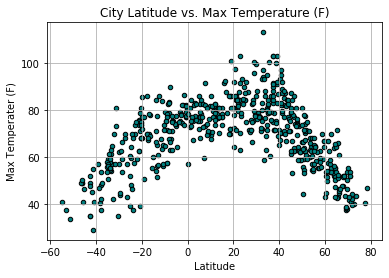

In [10]:
#Setting up the x and y values
x=city_weather_df["Lat"]
y=city_weather_df["Max Temp"]

#Creating the scatterplot with various formatting
plt.scatter(x, y, marker="o", facecolor="teal", s=20, edgecolor="black")

#Printing the labels on the graph
plt.grid(True)
plt.title("City Latitude vs. Max Temperature (F)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperater (F)")

#Saving the graph as a png file
plt.savefig("Lat_vs_Temp.png")

plt.show()



The "City Latitude vs. Max Temperature" is determining what the max temperature would be at a certain latitude. With the equator being 0 and the equator being known to be hotter the closser it is, you can tell that max temperature increases the closer it is to 0 latitude.

## Latitude vs. Humidity Plot

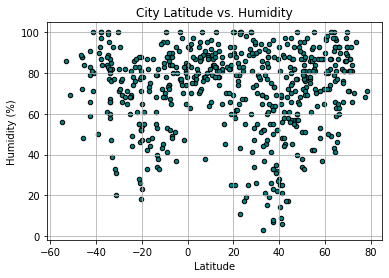

In [11]:
#Setting up the x and y values
x=city_weather_df["Lat"]
y=city_weather_df["Humidity"]

#Creating the scatterplot with various formatting
plt.scatter(x,y, marker="o", facecolor="teal", s=20, edgecolor="black")

#Printing the labels on the graph
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity")

#Saving the graph as a png file
plt.savefig("Lat_vs_Humidity.png")

plt.show()

The "City Latitude vs. Humidity" is determining where humidity falls depending on the latitude. The graph doesn't really show much since it is near uniformly spread in terms of high humidity. For low humidity, they tend to stay between the extremes of both sides of the latitudes.

## Latitude vs. Cloudiness Plot

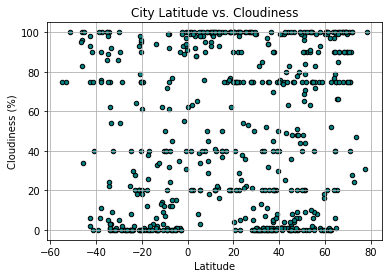

In [41]:
#Setting up the x and y values
x=city_weather_df["Lat"]
y=city_weather_df["Cloudiness"]

#Creating the scatterplot with various formatting
plt.scatter(x,y, marker="o", facecolor="teal", s=20, edgecolor="black")

#Printing the labels on the graph
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness")

#Saving the graph as a png file
plt.savefig("Lat_vs_Cloudiness.png")

plt.show()

The "City Latitude vs. Cloudiness" is determining how cloudy it is at different latitudes. Similar to the previous chart, not much can be determined from the chart.

## Latitude vs. Wind Speed Plot

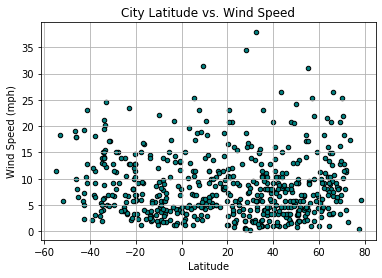

In [42]:
#Setting up the x and y values
x=city_weather_df["Lat"]
y=city_weather_df["Wind Speed"]

#Creating the scatterplot with various formatting
plt.scatter(x,y, marker="o", facecolor="teal", s=20, edgecolor="black")

#Printing the labels on the graph
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed")

#Saving the graph as a png file
plt.savefig("Lat_vs_WindSpeed.png")

plt.show()

The "City Latitude vs. Wind Speed" is determining the wind speed at certain latitudes. Again, the data is fairly uniformly dispersed so not much can be pulled from it.

## Linear Regression

In [14]:
#Creating a function to create Linear Regression plots
def linreg(x,y):
    x_values=x
    y_values=y
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    print(f"The r-squared is: {rvalue**2}")
    return

In [17]:
# Creating the Northern and Southern Hemisphere DataFrames
northern=city_weather_df.loc[city_weather_df["Lat"]>=0]
southern=city_weather_df.loc[city_weather_df["Lat"]<0]
northern.head()
southern.head()

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
1,Port Lincoln,AU,-34.73,135.87,50.76,89,5,12.95,1597009148
2,Rikitea,PF,-23.12,-134.97,69.94,76,28,23.44,1597009149
4,Carnarvon,AU,-24.87,113.63,64.40,68,40,13.87,1597009151
8,Punta Arenas,CL,-53.15,-70.92,37.40,86,75,18.34,1597009155
14,Kisanga,TZ,-7.44,37.70,67.62,65,0,3.22,1597009162


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4213290281514815


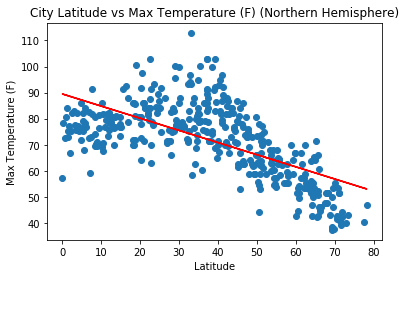

In [31]:
#Using the linear regression function
linreg(northern["Lat"],northern["Max Temp"])

#Labeling the graph
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs Max Temperature (F) (Northern Hemisphere)")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.541359884311336


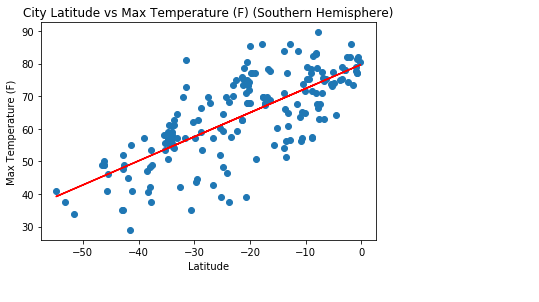

In [32]:
#Using the linear regression function
linreg(southern["Lat"],southern["Max Temp"])

#Labeling the graph
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs Max Temperature (F) (Southern Hemisphere)")
plt.show()

Between the two graphs of "City Latitude vs Max Temp" for both the northern and southern hemisphere, there are reversed which demonstrates well that the closer you are to the latitude of 0, the hotter it will be. This follows the scatter plot created with the values together. The r for both are fairly strong correlations.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0006200886802380682


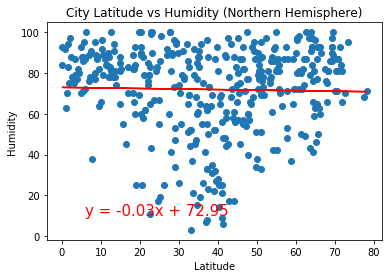

In [34]:
#Using the linear regression function
linreg(northern["Lat"],northern["Humidity"])

#Labeling the graph
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs Humidity (Northern Hemisphere)")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.008475037892489542


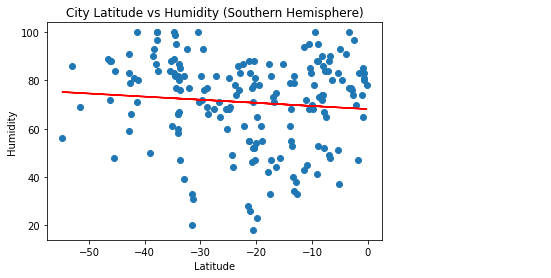

In [43]:
#Using the linear regression function
linreg(southern["Lat"],southern["Humidity"])

#Labeling the graph
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs Humidity (Southern Hemisphere)")
plt.show()

For the northern and southern hemisphere of "City Latitude vs Humidity", there is no correlation given that the r is near 0. Humidity isn't affected by how close you are to the equator.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 5.347335159738346e-06


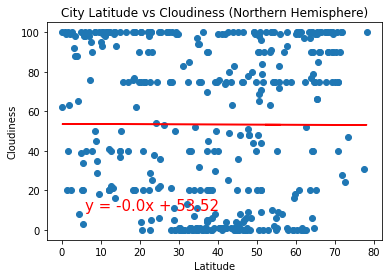

In [44]:
#Using the linear regression function
linreg(northern["Lat"],northern["Cloudiness"])

#Labeling the graph
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs Cloudiness (Northern Hemisphere)")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.02520247703511028


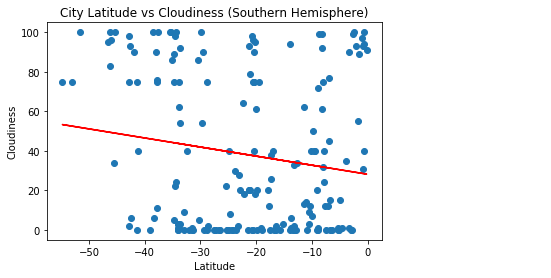

In [37]:
#Using the linear regression function
linreg(southern["Lat"],southern["Cloudiness"])

#Labeling the graph
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs Cloudiness (Southern Hemisphere)")
plt.show()

Similar to the pair of graphs above, there is no correlation between cloudiness and latitude.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0012007427156759416


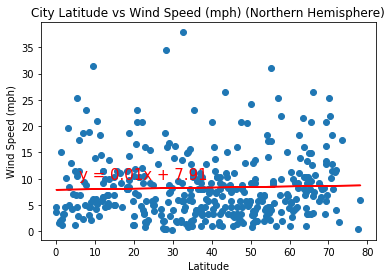

In [40]:
#Using the linear regression function
linreg(northern["Lat"],northern["Wind Speed"])

#Labeling the graph
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed (mph) (Northern Hemisphere)")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.08104502990165065


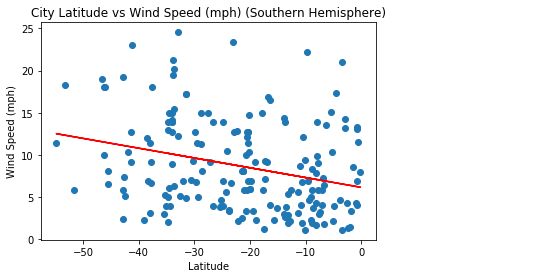

In [39]:
#Using the linear regression function
linreg(southern["Lat"],southern["Wind Speed"])

#Labeling the graph
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed (mph) (Southern Hemisphere)")
plt.show()

Following the trend, wind speed won't help decide what the whether is like the closer you are to the equator. Wind speed is fair across all latitudes.

In the end, the only real determining conclusion you can pull from the graphs is that there is some correlation between the temperature (max temp) to the equator. Humidity, cloudiness, and wind speed does not correlate with latitude.